# Spam Detection

In this project, we will see how we can perform Spam detection in the simplest way possible with the help of a Count Vectorizer and Multinomial Naive Bayes algorithm.

([source link](https://machinelearningprojects.net/spam-detection/))

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the datasets

In [2]:
sms = pd.read_csv("data/spam.csv", encoding="ISO-8859-1")
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


###  Dropping the unwanted columns and renaming the remaining columns

In [3]:
cols_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
sms.drop(cols_to_drop, axis=1, inplace=True)
sms.columns = ["label", "message"]
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
sms.isnull().sum()

label      0
message    0
dtype: int64

## Converting words into vectors

**Tfidf Vectorizer** is also tried but in this case CountVectorizer is giving better results

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(sms["message"])
y = sms["label"].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (5572, 8710)
y (5572,)


## Splitting data into train/test

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (3900, 8710)
X_test (1672, 8710)
y_train (3900,)
y_test (1672,)


## Training the model

In [8]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)

MultinomialNB()

## Predicting the test set

In [9]:
y_pred = mnb_clf.predict(X_test)
result = pd.DataFrame({"Actual": y_test, "Predict": y_pred})
result.head(10)

,Actual,Predict
0,spam,spam
1,ham,ham
2,spam,spam
3,ham,ham
4,ham,ham
5,ham,ham
6,spam,spam
7,ham,ham
8,ham,ham
9,ham,ham


## Evaluating the model


Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1464
        spam       0.94      0.95      0.94       208

    accuracy                           0.99      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672



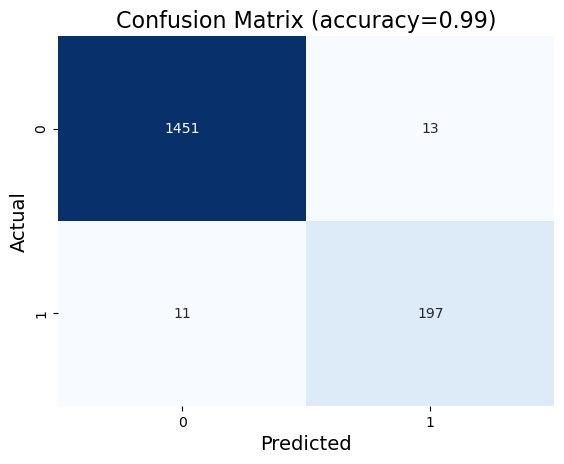

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);

## Visualizing the result

In [11]:
from wordcloud import WordCloud

def visualize(label):
    words = ''
    for msg in sms[sms["label"] == label]["message"]:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis("off")

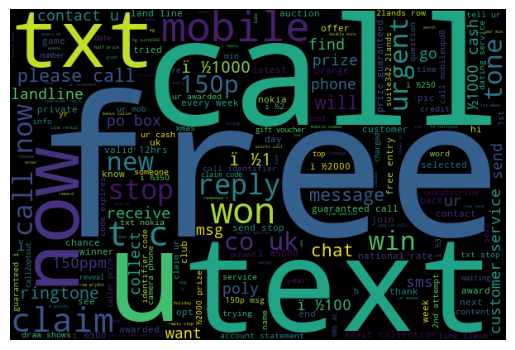

In [12]:
visualize("spam")

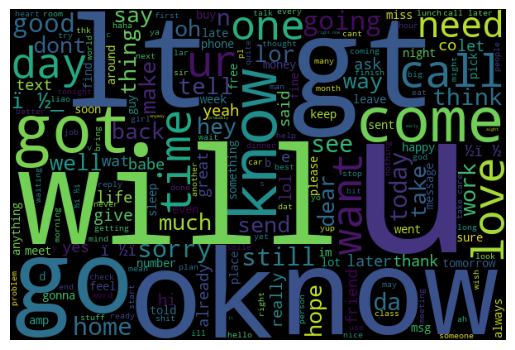

In [13]:
visualize("ham")

## Live prediction

In [14]:
def live_prediction(message):
    message = cv.transform([message])
    claass = mnb_clf.predict(message)
    print(f"This is a {claass[0]} message")

In [15]:
your_message = "You are the lucky winner for the lottery price of $6million."
live_prediction(your_message)

This is a spam message
